In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_path='drinks.csv'

drinks = pd.read_csv(file_path)


In [4]:
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [5]:
print(drinks.isnull().sum())

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
continent                       23
dtype: int64


In [6]:
# 결측데이터를 처리, 기타 대륙으로 통합 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')

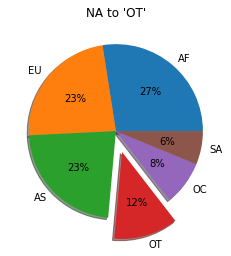

In [8]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.25, 0, 0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('NA to \'OT\'')
plt.show()

In [9]:
drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [10]:
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

In [11]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head

<bound method NDFrame.head of                  mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812
SA         114.750000   25  302  1377>

In [12]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구함
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [13]:
# 평균 beer_servings이 가장 높은 대륙을 구함
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


https://github.com/yoonkt200/python-data-analysis/blob/master/chapter1/02-drinks-eda.ipynb